# Discurso del presidente Andrés Manuel López Obrador durante el Tercer Informe de Gobierno

In [19]:
import pandas as pd 
import requests as rq
import numpy as np
import collections

In [20]:
#matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mlp
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import rcParams

In [45]:
#getting the speech from the url
website_url = rq.get('https://lopezobrador.org.mx/2021/09/01/discurso-del-presidente-andres-manuel-lopez-obrador-durante-el-tercer-informe-de-gobierno/').text

In [46]:
import lxml
from bs4 import BeautifulSoup 

import unicodedata

soup = BeautifulSoup(website_url, "lxml")

In [57]:
#retriving text from "p" founds
data = [element.text for element in soup.find_all("p")]
#convert tu string
data = str(data)
data

"['2021: Año de la Independencia', 'Amigas y amigos:', 'Mexicanas, mexicanos:', 'La transformación está en marcha y aunque es necesario seguir poniendo al descubierto la gran farsa neoliberal y auspiciando el cambio de mentalidad del pueblo –porque eso es lo más cercano a lo esencial y a lo irreversible–\\xa0 también estamos desterrando vicios y prácticas deshonestas en el manejo del gobierno.', 'Una medida decisiva fue parar en seco la tendencia privatizadora; se dejó de entregar concesiones a particulares en minas, agua, hospitales, puertos, vías férreas, playas, reclusorios y obras públicas. Pero, lo más importante, hemos detenido las privatizaciones en el sector energético: en petróleo y electricidad.', 'Esta nueva política energética busca producir en México las gasolinas que el país consume y dejar de importarlas; con este fin se continúa destinando recursos para la modernización de las seis refinerías existentes; en tres años la inversión pública destinada a las refinerías ha si

In [60]:
type(data)

str

In [61]:
# Reading data I found "xa0'" as a word, so I replace this with space
data = data.replace(u'\\xa0', u' ')
data

"['2021: Año de la Independencia', 'Amigas y amigos:', 'Mexicanas, mexicanos:', 'La transformación está en marcha y aunque es necesario seguir poniendo al descubierto la gran farsa neoliberal y auspiciando el cambio de mentalidad del pueblo –porque eso es lo más cercano a lo esencial y a lo irreversible–  también estamos desterrando vicios y prácticas deshonestas en el manejo del gobierno.', 'Una medida decisiva fue parar en seco la tendencia privatizadora; se dejó de entregar concesiones a particulares en minas, agua, hospitales, puertos, vías férreas, playas, reclusorios y obras públicas. Pero, lo más importante, hemos detenido las privatizaciones en el sector energético: en petróleo y electricidad.', 'Esta nueva política energética busca producir en México las gasolinas que el país consume y dejar de importarlas; con este fin se continúa destinando recursos para la modernización de las seis refinerías existentes; en tres años la inversión pública destinada a las refinerías ha sido d

In [62]:
#words that we want to ignore
from stop_words import get_stop_words
#spanish stop words
stop_words_es = get_stop_words('es')

In [63]:
from wordcloud import WordCloud, STOPWORDS

stop_words_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [64]:
stop_words = ["año", "mil", "pesos", "ciento", "millones", "tres", "ustedes"] + stop_words_es

amlo_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stop_words
)
#generate wordcloud
amlo_wc.generate(data)

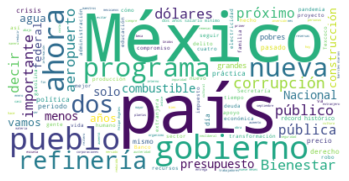

In [65]:
#display the WordCloud
plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

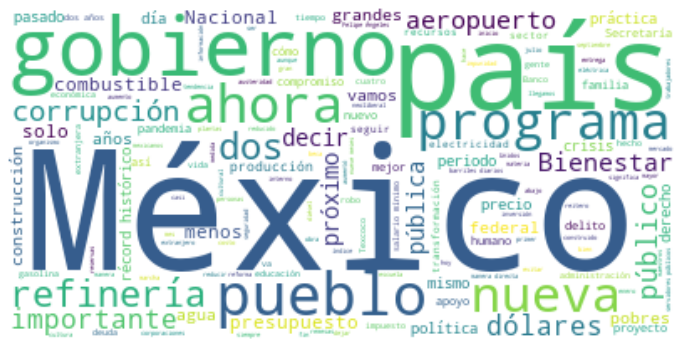

In [66]:
#re generate the word cloud
amlo_wc.generate(data)

#display the cloud
fig = plt.figure()
#set width
fig.set_figwidth(12)
#set height
fig.set_figheight(16)

plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

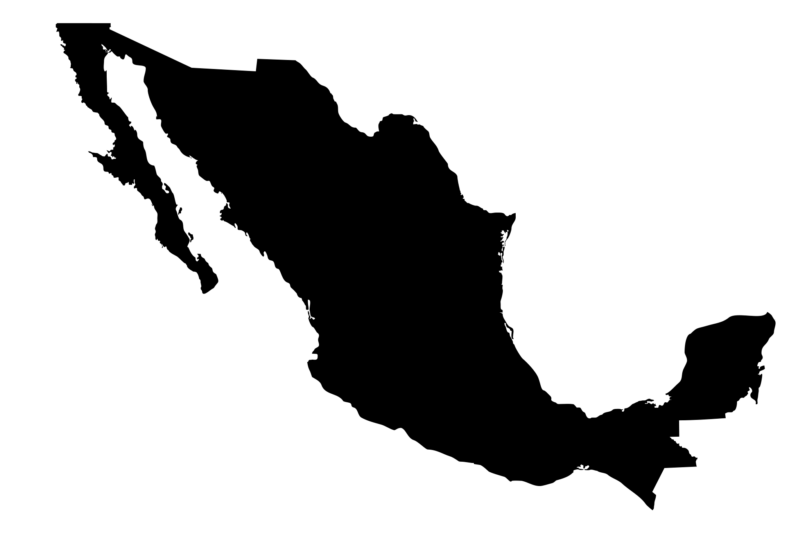

In [67]:
mx_mask = np.array(Image.open('mx-map.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, vmin=255, vmax=255, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
amlo_wc_mx = WordCloud(background_color='white', max_words=300, mask=mx_mask, stopwords=stop_words)

amlo_wc_mx.generate(data)

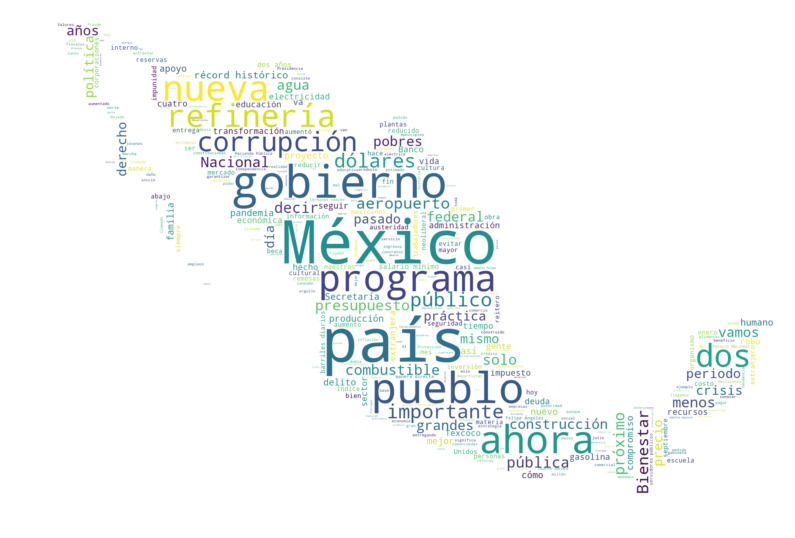

In [69]:
fig_mx = plt.figure()
fig_mx.set_figwidth(14) # set width
fig_mx.set_figheight(18) # set height


plt.imshow(amlo_wc_mx, interpolation='bilinear')
plt.axis('off')
plt.show()